In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType,BooleanType)
spark = SparkSession.builder.appName('cardio_disease_prediction').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/16 05:26:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Create a data schema for the data set with well structure
dataset_schema = [
    StructField('id',IntegerType(),False),
    StructField('age',IntegerType(),False),
    StructField('gender',IntegerType(),False),
    StructField('height',IntegerType(),False),
    StructField('weight',IntegerType(),False),
    StructField('ap_hi',IntegerType(),False),
    StructField('ap_lo',IntegerType(),False),
    StructField('cholesterol',IntegerType(),False),
    StructField('gluc',IntegerType(),False),
    StructField('smoke',IntegerType(),False),
    StructField('alco',IntegerType(),False),
    StructField('active',IntegerType(),False),
    StructField('cardio',IntegerType(),False)
]

data_struct = StructType(fields=dataset_schema)

# Merge two data sources into one dataframe
csv_1=spark.read.option("header", "true").csv("/home/ubuntu/INFOSYS-722-BDAS/heart_disease_1.csv", schema=data_struct)
csv_2=spark.read.option("header", "true").csv("/home/ubuntu/INFOSYS-722-BDAS/heart_disease_2.csv", schema=data_struct)
df = csv_1.unionByName(csv_2, allowMissingColumns=True)

# count
print("Row Count:", df.count())
print("Column Count:", len(df.columns))

Row Count: 69601
Column Count: 13


In [3]:
# Show Columns
print(df.columns)

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [4]:
# Describe
basic_statistics = df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+
|summary|                id|               age|             gender|            height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|              smoke|               alco|            active|            cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+------------------+
|  count|             69595|             69593|              69601|             69599|             69401|             69590|            69597|             69601|             69601|              69601|              69601|   

In [5]:
# First 20 rows in dataset
df.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|    71|  110|   70|          1|   1|    0|   0|     1|     0|
| 14|19834|     1|   164|    68|  110|   60

In [6]:
# check schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plotCategoryFeature(data, columns, rows, x_label, y_label):
    values = np.arange(0, 70000, 12000)
    value_increment = 1

    colors = plt.cm.BuPu(np.linspace(0.3, 0.6, len(rows)))
    n_rows = len(data)

    index = np.arange(len(columns)) + 0.3
    bar_width = 0.4

    y_offset = np.zeros(len(columns))

    cell_text = []
    for row in range(n_rows):
        plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
        y_offset = data[row]
        cell_text.append(['%1d' % (x) for x in y_offset])

    the_table = plt.table(cellText=cell_text,
                          rowLabels=rows,
                          rowColours=colors,
                          colLabels=columns,
                          loc='bottom')

    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.ylabel(y_label)
    plt.yticks(values * value_increment, ['%d' % val for val in values])
    plt.xticks([])
    plt.title(y_label+' / '+x_label)

    plt.show()

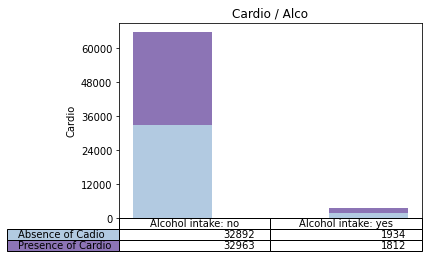

In [9]:
# plot cardio / alco bar chart
data = [[df.filter('cardio = 0').filter('alco =0').count(), df.filter('cardio = 0').filter('alco = 1').count()],[df.filter('cardio = 1').filter('alco =0').count(), df.filter('cardio = 1').filter('alco = 1').count()]]
columns = ('Alcohol intake: no', 'Alcohol intake: yes')
rows = ['Absence of Cadio', 'Presence of Cardio']
x_label="Alco"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

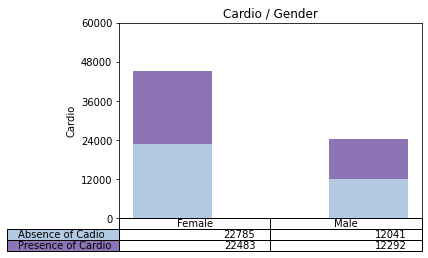

In [10]:
# plot cardio / gender bar chart
data = [[df.filter('cardio = 0').filter('gender =1').count(), df.filter('cardio = 0').filter('gender = 2').count()],[df.filter('cardio = 1').filter('gender =1').count(), df.filter('cardio = 1').filter('gender = 2').count()]]
columns = ('Female', 'Male')
rows = ['Absence of Cadio', 'Presence of Cardio']
x_label="Gender"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

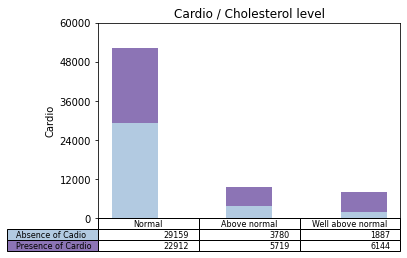

In [11]:
# plot cardio / cholesterol bar chart
data = [[df.filter('cardio = 0').filter('cholesterol =1').count(), df.filter('cardio = 0').filter('cholesterol = 2').count(), df.filter('cardio = 0').filter('cholesterol = 3').count()],[df.filter('cardio = 1').filter('cholesterol =1').count(), df.filter('cardio = 1').filter('cholesterol = 2').count(),df.filter('cardio = 1').filter('cholesterol = 3').count()]]
columns = ('Normal', 'Above normal', 'Well above normal')
rows = ['Absence of Cadio', 'Presence of Cardio']
x_label="Cholesterol level"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

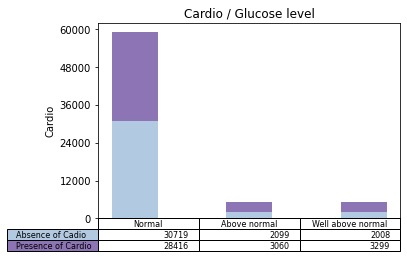

In [12]:
# plot cardio / gluc bar chart
data = [[df.filter('cardio = 0').filter('gluc =1').count(), df.filter('cardio = 0').filter('gluc = 2').count(), df.filter('cardio = 0').filter('gluc = 3').count()],[df.filter('cardio = 1').filter('gluc =1').count(), df.filter('cardio = 1').filter('gluc = 2').count(),df.filter('cardio = 1').filter('gluc = 3').count()]]
columns = ('Normal', 'Above normal', 'Well above normal')
rows = ['Absence of Cadio', 'Presence of Cardio']
x_label="Glucose level"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

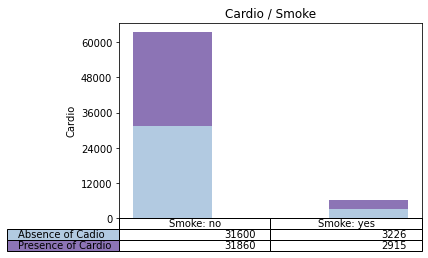

In [13]:
# plot cardio / smoke bar chart
data = [[df.filter('cardio = 0').filter('smoke =0').count(), df.filter('cardio = 0').filter('smoke = 1').count()],[df.filter('cardio = 1').filter('smoke =0').count(), df.filter('cardio = 1').filter('smoke = 1').count()]]
columns = ('Smoke: no', 'Smoke: yes')
rows = ['Absence of Cadio', 'Presence of Cardio']
x_label="Smoke"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

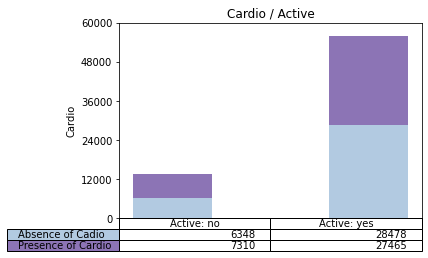

In [14]:
# plot cardio / active bar chart
data = [[df.filter('cardio = 0').filter('active =0').count(), df.filter('cardio = 0').filter('active = 1').count()],[df.filter('cardio = 1').filter('active =0').count(), df.filter('cardio = 1').filter('active = 1').count()]]
columns = ('Active: no', 'Active: yes')
rows = ['Absence of Cadio', 'Presence of Cardio']
x_label="Active"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

Cardio / Age


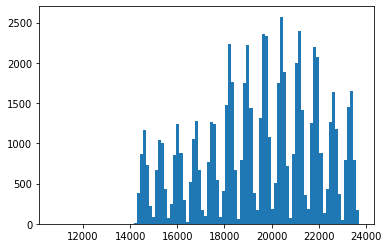

In [15]:
# display cardio / age barchart
print('Cardio / Age')
ageNpArr = np.array(df.filter('age>0').select('age').collect())
plt.hist(ageNpArr, 100)
plt.show()

Cardio / Ap_lo


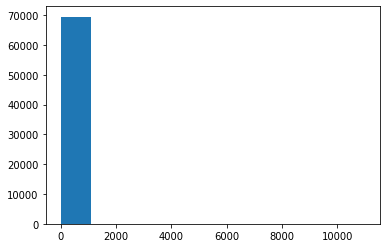

In [16]:
# Display cardio / ap_lo  bar chart
print('Cardio / Ap_lo')
ap_lo = np.array(df.filter('ap_lo>0').select('ap_lo').collect())
plt.hist(ap_lo, 10)
plt.show()

Cardio / Ap_hi


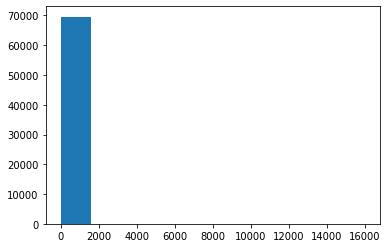

In [17]:
# Display cardio / ap_hi  bar chart
print('Cardio / Ap_hi')
ap_hi = np.array(df.filter('ap_hi>0').select('ap_hi').collect())
plt.hist(ap_hi, 10)
plt.show()

Cardio / Weight


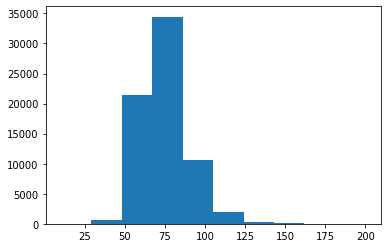

In [18]:
# Display weight / Cardio bar chart
print('Cardio / Weight')
weight = np.array(df.filter('weight>0').select('weight').collect())
plt.hist(weight, 10)
plt.show()

Cardio / Height


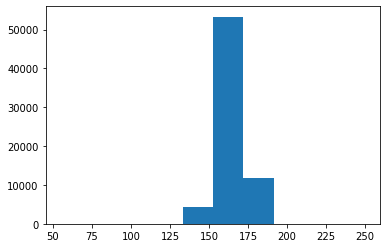

In [19]:
# Display height bar chart
print('Cardio / Height')
height = np.array(df.filter('height>0').select('height').collect())
plt.hist(height, 10)
plt.show()

In [20]:
# Check missing values
print("Missing values")
df.toPandas().isnull().sum()

Missing values


id               6
age              8
gender           0
height           2
weight         200
ap_hi           11
ap_lo            4
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
cardio           0
dtype: int64

In [21]:
# Method to find outerlier

from pyspark.sql.functions import col, count, expr

def find_outliers(df, columns):
    outliers_count = {}
    for column in columns:
        Q1 = df.select(column).toPandas().quantile(0.25)[column]
        Q3 = df.select(column).toPandas().quantile(0.75)[column]
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df.filter((col(column) < lower_bound) | (col(column) > upper_bound))
        outliers_count[column] = outliers.count()

    return outliers_count

In [22]:
columns = ["age", "height", "weight", "ap_hi", "ap_lo"]
outliers_count = find_outliers(df, columns)
print(outliers_count)

{'age': 4, 'height': 515, 'weight': 1802, 'ap_hi': 1426, 'ap_lo': 4608}


In [23]:
# Method to find extremes

def find_extremes(df):
    extreme_value_thresholds = {
        'height': (100, 250),  # Assuming height in cm
        'weight': (30, 250),   # Assuming weight in kg
        'ap_hi': (50, 250),    # Systolic blood pressure in mmHg
        'ap_lo': (30, 180),    # Diastolic blood pressure in mmHg
        'age': (0, 117 * 365)  # age in days
    }
    
    extreme_values_dict = {}
    
    for column, (lower_threshold, upper_threshold) in extreme_value_thresholds.items():
        # Filter rows where values are below the lower threshold or above the upper threshold
        extreme_values = df.filter((col(column) < lower_threshold) | (col(column) > upper_threshold))
        extreme_values_dict[column] = extreme_values.count()
    
    return extreme_values_dict

In [24]:
extreme_values_count = find_extremes(df)
print(extreme_values_count)

{'height': 29, 'weight': 7, 'ap_hi': 227, 'ap_lo': 1003, 'age': 0}


In [25]:
# Get correlations for cardio
correlations = []
for column in df.columns:
    correlations.append([column, df.corr('cardio', column, "pearson")])
schema = StructType([ 
    StructField("name",StringType(),True), 
    StructField("correlation",FloatType(),True)
  ])

corr_df = spark.createDataFrame(data=correlations,schema=schema)
corr_df.printSchema()
corr_df.show()

root
 |-- name: string (nullable = true)
 |-- correlation: float (nullable = true)



+-----------+-------------+
|       name|  correlation|
+-----------+-------------+
|         id| 0.0041427356|
|        age|   0.23773436|
|     gender|  0.008099986|
|     height| -0.009872831|
|     weight|   0.17463471|
|      ap_hi|  0.054296993|
|      ap_lo|    0.0674119|
|cholesterol|    0.2210763|
|       gluc|   0.08920544|
|      smoke| -0.015526061|
|       alco|-0.0075927465|
|     active|  -0.03516442|
|     cardio|          1.0|
+-----------+-------------+



In [26]:
df = df.drop('id')

In [27]:
# Drop missing values
df.na.drop().show()
print('before dropping missing values: ', df.count())
df=df.na.drop()
print('after dropping missing values: ', df.count())

+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
|17668|     1|   158|    71|  110|   70|          1|   1|    0|   0|     1|     0|
|19834|     1|   164|    68|  110|   60|          1|   1|    0|   0|     0|     0|
|225

In [28]:
def remove_outliers(df):
    columns = ["age", "height", "weight", "ap_hi", "ap_lo"]
    for column in columns:
        Q1 = df.select(column).toPandas().quantile(0.25)[column]
        Q3 = df.select(column).toPandas().quantile(0.75)[column]
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter DataFrame to keep only non-outliers
        df = df.filter((col(column) >= lower_bound) & (col(column) <= upper_bound))
    
    return df

def remove_extremes(df):
    extreme_value_thresholds = {
        'height': (100, 250),  # Assuming height in cm
        'weight': (30, 250),   # Assuming weight in kg
        'ap_hi': (50, 250),    # Systolic blood pressure in mmHg
        'ap_lo': (30, 180),    # Diastolic blood pressure in mmHg
        'age': (0, 117 * 365)  # age in days
    }

    for column, (lower_threshold, upper_threshold) in extreme_value_thresholds.items():
        # Filter DataFrame to remove rows outside the defined thresholds
        df = df.filter((col(column) >= lower_threshold) & (col(column) <= upper_threshold))
    
    return df

df = remove_outliers(df)
df = remove_extremes(df)

In [29]:
print("rows count:", df.count())

rows count: 61956


Before removing extremes and outliners, there were 2 cases where diastolic blook pressure is higher than systolic one. 


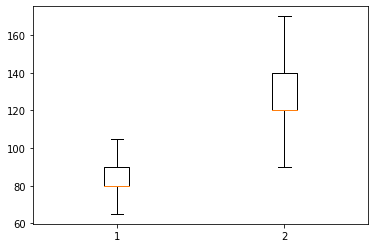

In [30]:
# Count how many ap_lo is greater than ap_hi after removing outliers
wrong_data = df.filter('ap_lo>ap_hi').count()
print('Before removing extremes and outliners, there were {} cases where diastolic blook pressure is higher than systolic one. '.format(wrong_data))
data= np.array(df.select('ap_lo','ap_hi').collect())
fig, ax=plt.subplots()
ax.boxplot(data)
plt.show()

In [31]:
# correct data
df = df.filter('ap_lo <= ap_hi')

In [32]:
print("row count:", df.count())

row count: 61954


In [33]:
from pyspark.sql.functions import when
from pyspark.sql.functions import lit

# add BMI cat column
df=df.withColumn('bmi', df.weight/((df.height/100)*(df.height/100)))

df=df.withColumn('bmi_cat', 
              when((df.bmi < 18.5), lit(1)) 
              .when((df.bmi >= 18.5) & (df.bmi < 25), lit(2))
              .when((df.bmi >= 25) & (df.bmi < 30), lit(3))
              .otherwise(lit(4)))
df=df.drop('weight','height','bmi')

In [34]:
df.show()

+-----+------+-----+-----+-----------+----+-----+----+------+------+-------+
|  age|gender|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|bmi_cat|
+-----+------+-----+-----+-----------+----+-----+----+------+------+-------+
|20228|     1|  140|   90|          3|   1|    0|   0|     1|     1|      4|
|18857|     1|  130|   70|          3|   1|    0|   0|     0|     1|      2|
|17623|     2|  150|  100|          1|   1|    0|   0|     1|     1|      3|
|21914|     1|  120|   80|          2|   2|    0|   0|     0|     0|      3|
|22113|     1|  130|   80|          3|   1|    0|   0|     1|     0|      4|
|22584|     2|  130|   90|          3|   3|    0|   0|     1|     1|      3|
|17668|     1|  110|   70|          1|   1|    0|   0|     1|     0|      3|
|22530|     1|  120|   80|          1|   1|    0|   0|     1|     0|      3|
|18815|     2|  120|   80|          1|   1|    0|   0|     1|     0|      2|
|14791|     2|  120|   80|          1|   1|    0|   0|     0|     0|      2|

In [35]:
df=df.withColumn('ap_hi', 
              when((df.ap_hi < 120), lit(1)) 
              .when((df.ap_hi >= 120) & (df.ap_hi <= 129), lit(2))
              .when((df.ap_hi >= 130) & (df.ap_hi <= 139), lit(3))
              .when((df.ap_hi >= 140) & (df.ap_hi < 149), lit(4))
              .otherwise(lit(5)))

df=df.withColumn('ap_lo', 
              when((df.ap_lo < 80), lit(1)) 
              .when((df.ap_lo >= 80) & (df.ap_lo <= 89), lit(2))
              .when((df.ap_lo >= 90) & (df.ap_lo <= 120), lit(3))
              .otherwise(lit(4)))

df=df.withColumn('age', (df.age/365))
df=df.withColumn('age', col("age").cast("Integer"))

In [36]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+
|summary|              age|            gender|             ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|             cardio|           bmi_cat|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+
|  count|            61954|             61954|             61954|             61954|             61954|             61954|              61954|               61954|             61954|              61954|             61954|
|   mean|52.90794783226265| 1.348645769441844|2.6060625625464056| 2.100300222745908| 1.357910707944604|1.2209865

In [37]:
df.count()

61954

In [38]:
df = df.drop('active')

In [39]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+-------------------+------------------+
|summary|              age|            gender|             ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|             cardio|           bmi_cat|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+-------------------+------------------+
|  count|            61954|             61954|             61954|             61954|             61954|             61954|              61954|               61954|              61954|             61954|
|   mean|52.90794783226265| 1.348645769441844|2.6060625625464056| 2.100300222745908| 1.357910707944604|1.2209865383994576|0.08620912289763373|0.052022468282919586|0.49385027601123416|2.850

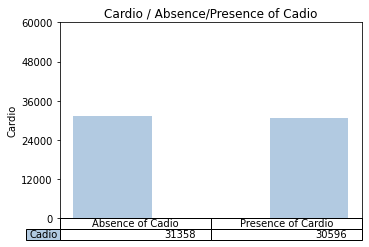

In [40]:
# show cardio distribution bar chart
data = [[df.filter('cardio = 0').count(), df.filter('cardio = 1').count()]]
columns = ('Absence of Cadio', 'Presence of Cardio')
rows = ['Cadio']
x_label="Absence/Presence of Cadio"
y_label="Cardio"
plotCategoryFeature(data, columns,rows,x_label,y_label)

In [41]:
import pyspark.sql.functions as F

# Oversampling the data
major_df = df.filter('cardio = 0')
print('Number of absence of cardiovascular disease: {}'.format(df.filter('cardio = 0').count()))
minor_df = df.filter('cardio = 1')
print('Number of presense of cardiovascular disease: {}'.format(df.filter('cardio = 1').count()))
ratio = int(major_df.count()/minor_df.count())
print('Ratio of absence vs presence: {}'.format(ratio))
print('Total of records: {}'.format(df.count()))
a = range(ratio)

# duplicate the minority rows in this case the ratio is 1 so it does not duplicate rows
oversampled_df = minor_df.withColumn("dummy", F.explode(F.array([F.lit(x) for x in a]))).drop("dummy")

# combine both oversampled minority rows and previous majority rows
df = major_df.unionAll(oversampled_df)
print('Final total of records: {}'.format(df.count()))

Number of absence of cardiovascular disease: 31358
Number of presense of cardiovascular disease: 30596
Ratio of absence vs presence: 1
Total of records: 61954
Final total of records: 61954


In [42]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

# Slit training and testing data set
inputCols=["age", "gender",  "ap_hi","ap_lo","cholesterol","gluc","smoke","alco","bmi_cat"]
assembler = VectorAssembler(inputCols=inputCols,outputCol="features")
output = assembler.transform(df)
indexer = StringIndexer(inputCol="cardio", outputCol="Cardio")
output_fixed = indexer.fit(output).transform(output)
final_data = output_fixed.select("features",'Cardio')
train_data, test_data = final_data.randomSplit([0.8, 0.2])

In [43]:
#Logistic regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

log_reg = LogisticRegression(featuresCol='features',labelCol='Cardio')
model_lr = log_reg.fit(train_data)
predictions_lr = model_lr.evaluate(test_data)
predictions_lr.predictions.show()
prediction_lr = model_lr.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')
print("Logistic regression classifier accuracy: {}%".format(my_binary_eval.evaluate(prediction_lr) * 100))

24/05/16 05:27:51 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/16 05:27:51 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------------------+------+--------------------+--------------------+----------+
|            features|Cardio|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[39.0,1.0,1.0,1.0...|   0.0|[2.41989341898744...|[0.91833175147385...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[2.27366458655891...|[0.90667233877667...|       0.0|
|[39

Logistic regression classifier accuracy: 77.85929029882772%


In [44]:
# Naive Bayes
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(featuresCol='features',labelCol='Cardio')
model_nb = nb.fit(train_data)
prediction_nb = model_nb.transform(test_data)
prediction_nb.show()
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')
print("Naive Bayes classifier accuracy: {}%".format(my_binary_eval.evaluate(prediction_nb) * 100))

+--------------------+------+--------------------+--------------------+----------+
|            features|Cardio|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|[39.0,1.0,1.0,1.0...|   0.0|[-29.709778485875...|[0.59770747546988...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39.0,1.0,1.0,1.0...|   0.0|[-32.834346840861...|[0.59550518881522...|       0.0|
|[39

Naive Bayes classifier accuracy: 27.009420015627267%


In [45]:
# Decision tree 
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol='Cardio',featuresCol='features')
model_dt = dt.fit(train_data)
prediction_dt = model_dt.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')

print("Decision tree classifier accuracy: {}%".format(my_binary_eval.evaluate(prediction_dt) * 100))
print(model_dt.toDebugString)

Decision tree classifier accuracy: 54.95153812957565%
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_d42c8c9722f7, depth=5, numNodes=29, numClasses=2, numFeatures=9
  If (feature 2 <= 2.5)
   If (feature 0 <= 54.5)
    If (feature 4 <= 2.5)
     Predict: 0.0
    Else (feature 4 > 2.5)
     If (feature 5 <= 2.5)
      Predict: 1.0
     Else (feature 5 > 2.5)
      Predict: 0.0
   Else (feature 0 > 54.5)
    If (feature 4 <= 2.5)
     If (feature 0 <= 60.5)
      Predict: 0.0
     Else (feature 0 > 60.5)
      If (feature 1 <= 1.5)
       Predict: 1.0
      Else (feature 1 > 1.5)
       Predict: 0.0
    Else (feature 4 > 2.5)
     Predict: 1.0
  Else (feature 2 > 2.5)
   If (feature 2 <= 3.5)
    If (feature 4 <= 2.5)
     If (feature 0 <= 58.5)
      If (feature 3 <= 2.5)
       Predict: 0.0
      Else (feature 3 > 2.5)
       Predict: 1.0
     Else (feature 0 > 58.5)
      Predict: 1.0
    Else (feature 4 > 2.5)
     Predict: 1.0
   Else (feature 2 > 3.5)
    If (feature 2

In [46]:
# Random forest tree
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(labelCol='Cardio',featuresCol='features')
model_rfc=rfc.fit(train_data)
prediction_rfc=model_rfc.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')
print("Random Forest classifier accurary: {}%".format(my_binary_eval.evaluate(prediction_rfc) * 100))
print(model_rfc.toDebugString)

Random Forest classifier accurary: 77.88021846449614%
RandomForestClassificationModel: uid=RandomForestClassifier_0c19347b0096, numTrees=20, numClasses=2, numFeatures=9
  Tree 0 (weight 1.0):
    If (feature 8 <= 3.5)
     If (feature 8 <= 2.5)
      If (feature 4 <= 1.5)
       If (feature 6 <= 0.5)
        If (feature 0 <= 54.5)
         Predict: 0.0
        Else (feature 0 > 54.5)
         Predict: 1.0
       Else (feature 6 > 0.5)
        If (feature 3 <= 2.5)
         Predict: 0.0
        Else (feature 3 > 2.5)
         Predict: 1.0
      Else (feature 4 > 1.5)
       If (feature 3 <= 2.5)
        If (feature 7 <= 0.5)
         Predict: 1.0
        Else (feature 7 > 0.5)
         Predict: 0.0
       Else (feature 3 > 2.5)
        Predict: 1.0
     Else (feature 8 > 2.5)
      If (feature 3 <= 2.5)
       If (feature 0 <= 56.5)
        Predict: 0.0
       Else (feature 0 > 56.5)
        Predict: 1.0
      Else (feature 3 > 2.5)
       Predict: 1.0
    Else (feature 8 > 3.5)
     If

In [47]:
# Gradient boosted tree
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol='Cardio',featuresCol='features')
model_gbt=gbt.fit(train_data)
prediction_gbt=model_gbt.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')
print("Gradient boosted tree classifier accuracy: {}%".format(my_binary_eval.evaluate(prediction_gbt) * 100))
print(model_gbt.toDebugString)

Gradient boosted tree classifier accuracy: 78.56729266963717%
GBTClassificationModel: uid = GBTClassifier_8e64df1aefbf, numTrees=20, numClasses=2, numFeatures=9
  Tree 0 (weight 1.0):
    If (feature 2 <= 2.5)
     If (feature 0 <= 54.5)
      If (feature 4 <= 2.5)
       If (feature 0 <= 44.5)
        If (feature 4 <= 1.5)
         Predict: -0.738060479666319
        Else (feature 4 > 1.5)
         Predict: -0.41935483870967744
       Else (feature 0 > 44.5)
        If (feature 2 <= 1.5)
         Predict: -0.5956719817767654
        Else (feature 2 > 1.5)
         Predict: -0.4381609195402299
      Else (feature 4 > 2.5)
       If (feature 5 <= 2.5)
        If (feature 3 <= 1.5)
         Predict: 0.25
        Else (feature 3 > 1.5)
         Predict: 0.549407114624506
       Else (feature 5 > 2.5)
        If (feature 2 <= 1.5)
         Predict: -0.46835443037974683
        Else (feature 2 > 1.5)
         Predict: -0.010526315789473684
     Else (feature 0 > 54.5)
      If (feature 4 <=

In [48]:
# use Random Forest Classifer to build model
rfc = RandomForestClassifier(labelCol='Cardio',featuresCol='features')
model_rfc=rfc.fit(train_data)
prediction_rfc=model_rfc.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')

print("Random Forest classifier accurary: {}%".format(my_binary_eval.evaluate(prediction_rfc) * 100))
print(model_rfc.toDebugString)

Random Forest classifier accurary: 77.88021846449615%
RandomForestClassificationModel: uid=RandomForestClassifier_4416ef27058e, numTrees=20, numClasses=2, numFeatures=9
  Tree 0 (weight 1.0):
    If (feature 8 <= 3.5)
     If (feature 8 <= 2.5)
      If (feature 4 <= 1.5)
       If (feature 6 <= 0.5)
        If (feature 0 <= 54.5)
         Predict: 0.0
        Else (feature 0 > 54.5)
         Predict: 1.0
       Else (feature 6 > 0.5)
        If (feature 3 <= 2.5)
         Predict: 0.0
        Else (feature 3 > 2.5)
         Predict: 1.0
      Else (feature 4 > 1.5)
       If (feature 3 <= 2.5)
        If (feature 7 <= 0.5)
         Predict: 1.0
        Else (feature 7 > 0.5)
         Predict: 0.0
       Else (feature 3 > 2.5)
        Predict: 1.0
     Else (feature 8 > 2.5)
      If (feature 3 <= 2.5)
       If (feature 0 <= 56.5)
        Predict: 0.0
       Else (feature 0 > 56.5)
        Predict: 1.0
      Else (feature 3 > 2.5)
       Predict: 1.0
    Else (feature 8 > 3.5)
     If

In [49]:
# rebuild the model - 1
from pyspark.ml import Pipeline

df=df.withColumn('smoke',col('smoke').cast(StringType()))
df=df.withColumn('gender',col('gender').cast(StringType()))
df=df.withColumn('ap_hi',col('ap_hi').cast(StringType()))
df=df.withColumn('ap_lo',col('ap_lo').cast(StringType()))
df=df.withColumn('gluc',col('gluc').cast(StringType()))
df=df.withColumn('cholesterol',col('cholesterol').cast(StringType()))
df=df.withColumn('alco',col('alco').cast(StringType()))
df=df.withColumn('bmi_cat',col('bmi_cat').cast(StringType()))
df=df.withColumn('cardio',col('cardio').cast(StringType()))

inputCols=["age", "gender_index",  "ap_hi_index","ap_lo_index","cholesterol_index","gluc_index","smoke_index","alco_index","bmi_cat_index"]
genderIndexer = StringIndexer().setInputCol("gender").setOutputCol("gender_index")
hiIndexer = StringIndexer().setInputCol("ap_hi").setOutputCol("ap_hi_index")
loIndexer = StringIndexer().setInputCol("ap_lo").setOutputCol("ap_lo_index")
cholendexer = StringIndexer().setInputCol("cholesterol").setOutputCol("cholesterol_index")
glucIndexer = StringIndexer().setInputCol("gluc").setOutputCol("gluc_index")
smokeIndexer = StringIndexer().setInputCol("smoke").setOutputCol("smoke_index")
alcoIndexer = StringIndexer().setInputCol("alco").setOutputCol("alco_index")
bmiIndexer = StringIndexer().setInputCol("bmi_cat").setOutputCol("bmi_cat_index")

assembler  = VectorAssembler().setInputCols(inputCols).setOutputCol("features")
labelIndexer = StringIndexer().setInputCol("cardio").setOutputCol("Cardio")

rfc = RandomForestClassifier(labelCol='Cardio',featuresCol='features')
pipeline = Pipeline(stages=[genderIndexer,hiIndexer,loIndexer,cholendexer,glucIndexer,smokeIndexer,alcoIndexer,bmiIndexer,labelIndexer,assembler,rfc])

# split the data again since the type change
train_data, test_data = df.randomSplit([0.8, 0.2])
model_rfc=pipeline.fit(train_data)
prediction_rfc=model_rfc.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')

features=["age", "gender",  "systolic blood pressure","diastolic blood pressure","cholesterol","glucose","smoking","alcohol","bmi level"]
tree=model_rfc.stages[10].toDebugString
for row in inputCols:
    index=inputCols.index(row)
    tree=tree.replace('feature '+str(index),features[index])

print("Random Forest classifier accurary: {}%".format(my_binary_eval.evaluate(prediction_rfc) * 100))
print(tree)

Random Forest classifier accurary: 77.78746232472893%
RandomForestClassificationModel: uid=RandomForestClassifier_af5469d80ab5, numTrees=20, numClasses=2, numFeatures=9
  Tree 0 (weight 1.0):
    If (bmi level in {2.0,3.0})
     If (bmi level in {3.0})
      If (cholesterol in {2.0})
       If (smoking in {1.0})
        Predict: 1.0
       Else (smoking not in {1.0})
        If (age <= 46.5)
         Predict: 1.0
        Else (age > 46.5)
         Predict: 0.0
      Else (cholesterol not in {2.0})
       If (age <= 59.5)
        Predict: 0.0
       Else (age > 59.5)
        Predict: 1.0
     Else (bmi level not in {3.0})
      If (diastolic blood pressure in {0.0,2.0})
       If (age <= 52.5)
        Predict: 0.0
       Else (age > 52.5)
        Predict: 1.0
      Else (diastolic blood pressure not in {0.0,2.0})
       Predict: 1.0
    Else (bmi level not in {2.0,3.0})
     If (age <= 54.5)
      If (systolic blood pressure in {1.0,2.0,3.0,4.0})
       If (age <= 46.5)
        If (chol

In [50]:
# rebuild the model - 2

rfc = RandomForestClassifier(labelCol='Cardio',featuresCol='features', numTrees=3, maxDepth=5)
pipeline = Pipeline(stages=[genderIndexer,hiIndexer,loIndexer,cholendexer,glucIndexer,smokeIndexer,alcoIndexer,bmiIndexer,labelIndexer,assembler,rfc])

# split the data again since the type change
model_rfc=pipeline.fit(train_data)
prediction_rfc=model_rfc.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')

features=["age", "gender",  "systolic blood pressure","diastolic blood pressure","cholesterol","glucose","smoking","alcohol","bmi level"]
tree=model_rfc.stages[10].toDebugString
for row in inputCols:
    index=inputCols.index(row)
    tree=tree.replace('feature '+str(index),features[index])

print("Random Forest classifier accurary: {}%".format(my_binary_eval.evaluate(prediction_rfc) * 100))
print(tree)

Random Forest classifier accurary: 76.37870120031354%
RandomForestClassificationModel: uid=RandomForestClassifier_866567ceff22, numTrees=3, numClasses=2, numFeatures=9
  Tree 0 (weight 1.0):
    If (diastolic blood pressure in {2.0})
     If (cholesterol in {2.0})
      If (smoking in {1.0})
       Predict: 1.0
      Else (smoking not in {1.0})
       If (age <= 56.5)
        If (bmi level in {1.0,2.0,3.0})
         Predict: 1.0
        Else (bmi level not in {1.0,2.0,3.0})
         Predict: 0.0
       Else (age > 56.5)
        Predict: 1.0
     Else (cholesterol not in {2.0})
      If (alcohol in {1.0})
       If (systolic blood pressure in {2.0,3.0,4.0})
        If (systolic blood pressure in {3.0,4.0})
         Predict: 0.0
        Else (systolic blood pressure not in {3.0,4.0})
         Predict: 1.0
       Else (systolic blood pressure not in {2.0,3.0,4.0})
        Predict: 0.0
      Else (alcohol not in {1.0})
       If (cholesterol in {1.0})
        If (systolic blood pressure in

In [51]:
# finish building model

rfc = RandomForestClassifier(labelCol='Cardio',featuresCol='features', numTrees=3, maxDepth=5)
pipeline = Pipeline(stages=[genderIndexer,hiIndexer,loIndexer,cholendexer,glucIndexer,smokeIndexer,alcoIndexer,bmiIndexer,labelIndexer,assembler,rfc])

model_rfc=pipeline.fit(train_data)
prediction_rfc=model_rfc.transform(test_data)
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')

In [52]:
features=["age", "gender",  "systolic blood pressure","diastolic blood pressure","cholesterol","glucose","smoking","alcohol","bmi level"]
tree=model_rfc.stages[10].toDebugString
for row in inputCols:
    index=inputCols.index(row)
    tree=tree.replace('feature '+str(index),features[index])
print(tree)

RandomForestClassificationModel: uid=RandomForestClassifier_2fbca7516648, numTrees=3, numClasses=2, numFeatures=9
  Tree 0 (weight 1.0):
    If (diastolic blood pressure in {2.0})
     If (cholesterol in {2.0})
      If (smoking in {1.0})
       Predict: 1.0
      Else (smoking not in {1.0})
       If (age <= 56.5)
        If (bmi level in {1.0,2.0,3.0})
         Predict: 1.0
        Else (bmi level not in {1.0,2.0,3.0})
         Predict: 0.0
       Else (age > 56.5)
        Predict: 1.0
     Else (cholesterol not in {2.0})
      If (alcohol in {1.0})
       If (systolic blood pressure in {2.0,3.0,4.0})
        If (systolic blood pressure in {3.0,4.0})
         Predict: 0.0
        Else (systolic blood pressure not in {3.0,4.0})
         Predict: 1.0
       Else (systolic blood pressure not in {2.0,3.0,4.0})
        Predict: 0.0
      Else (alcohol not in {1.0})
       If (cholesterol in {1.0})
        If (systolic blood pressure in {2.0,3.0,4.0})
         Predict: 1.0
        Else (sy

In [53]:
print("Random Forest classifier accurary: {}%".format(my_binary_eval.evaluate(prediction_rfc) * 100))

Random Forest classifier accurary: 76.37870120031354%


In [54]:
importances = model_rfc.stages[10].featureImportances
importance_dict = {features[i]: importances[i] for i in range(len(features))}
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importances:
diastolic blood pressure: 0.37018098335353794
systolic blood pressure: 0.3368632573445655
cholesterol: 0.16544818050061275
age: 0.10863451727839608
bmi level: 0.015353926096848838
glucose: 0.0023267278997681287
alcohol: 0.0006980733040648782
smoking: 0.00033064404425359254
gender: 0.00016369017795230258


In [55]:
df.show()

+---+------+-----+-----+-----------+----+-----+----+------+-------+
|age|gender|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|cardio|bmi_cat|
+---+------+-----+-----+-----------+----+-----+----+------+-------+
| 60|     1|    2|    2|          2|   2|    0|   0|     0|      3|
| 60|     1|    3|    2|          3|   1|    0|   0|     0|      4|
| 48|     1|    1|    1|          1|   1|    0|   0|     0|      3|
| 61|     1|    2|    2|          1|   1|    0|   0|     0|      3|
| 51|     2|    2|    2|          1|   1|    0|   0|     0|      2|
| 40|     2|    2|    2|          1|   1|    0|   0|     0|      2|
| 54|     1|    1|    1|          1|   1|    0|   0|     0|      4|
| 39|     2|    3|    3|          1|   1|    1|   1|     0|      3|
| 47|     1|    1|    1|          1|   1|    0|   0|     0|      3|
| 59|     2|    2|    1|          1|   1|    1|   0|     0|      2|
| 58|     1|    3|    2|          1|   1|    0|   0|     0|      3|
| 39|     1|    3|    3|          2|   1|    0| 

In [56]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- ap_hi: string (nullable = false)
 |-- ap_lo: string (nullable = false)
 |-- cholesterol: string (nullable = true)
 |-- gluc: string (nullable = true)
 |-- smoke: string (nullable = true)
 |-- alco: string (nullable = true)
 |-- cardio: string (nullable = true)
 |-- bmi_cat: string (nullable = false)



In [57]:
# Visual input data has been plot in the ealier code section

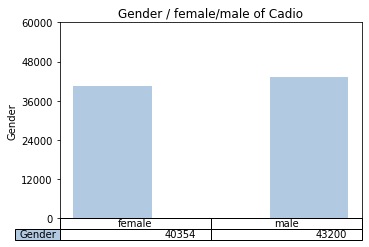

In [58]:
# oversample the gender
from pyspark.sql.functions import col, explode, array, lit

gender_count = df.groupBy("gender").count()

# Collect the counts in driver
gender_count_list = gender_count.collect()

# Finding the gender with the maximum count
max_count_gender = max(gender_count_list, key=lambda x: x[1])

# Sample the underrepresented class
balanced_df = None
for row in gender_count_list:
    if row[0] == max_count_gender[0]:
        balanced_df = df.filter(col("gender") == row[0])
    else:
        replication_factor = int(max_count_gender[1] / row[1]) + (max_count_gender[1] % row[1] > 0) # Ensure it is at least 1
        replicated_df = df.filter(col("gender") == row[0]).withColumn("dummy", explode(array([lit(1)] * replication_factor)))
        balanced_df = balanced_df.union(replicated_df.drop("dummy"))

df = balanced_df


data = [[df.filter('gender = 1').count(), df.filter('gender = 2').count()]]
columns = ('female', 'male')
rows = ['Gender']
x_label="female/male of Cadio"
y_label="Gender"
plotCategoryFeature(data, columns,rows,x_label,y_label)

In [61]:
rfc = RandomForestClassifier(labelCol='Cardio',featuresCol='features')
pipeline = Pipeline(stages=[genderIndexer,hiIndexer,loIndexer,cholendexer,glucIndexer,smokeIndexer,alcoIndexer,bmiIndexer,labelIndexer,assembler,rfc])

model_rfc=pipeline.fit(train_data)

importances = model_rfc.stages[10].featureImportances
importance_dict = {features[i]: importances[i] for i in range(len(features))}
print("Feature Importances:")
for feature, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importances:
systolic blood pressure: 0.5704246027093214
diastolic blood pressure: 0.1748339391503943
cholesterol: 0.12270383515389335
age: 0.10240879647581454
bmi level: 0.023869510914802772
glucose: 0.0039502523325577665
smoking: 0.0007153004641651868
gender: 0.0005804460947440289
alcohol: 0.0005133167043067803


In [62]:
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'Cardio')
print("Random Forest classifier accurary: {}%".format(my_binary_eval.evaluate(prediction_rfc) * 100))

Random Forest classifier accurary: 76.37870120031354%
